<a href="https://colab.research.google.com/github/vcautela/e-commerce_RFM/blob/main/e_commerce_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ydata_profiling
!pip install fastapi
!pip install kaleido
!pip install python-multipart
!pip install uvicorn
!pip install cohere
!pip install openai
!pip install tiktoken
!pip install sidetable
!pip install ydata_profiling
!pip install typing-extensions --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=0e926caf4831a0323c3803d811483ea5083bb20aac0cebbe6d4a15e4d93871e4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
  

In [3]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio 5 DNC/data.csv', sep=',', encoding='latin1')

In [6]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df_corr = df.corr(method='spearman')
df_corr

<ipython-input-10-f880cf003997>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method='spearman')


,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.385407,-0.141124
UnitPrice,-0.385407,1.000000,-0.013255
CustomerID,-0.141124,-0.013255,1.000000


<Axes: >

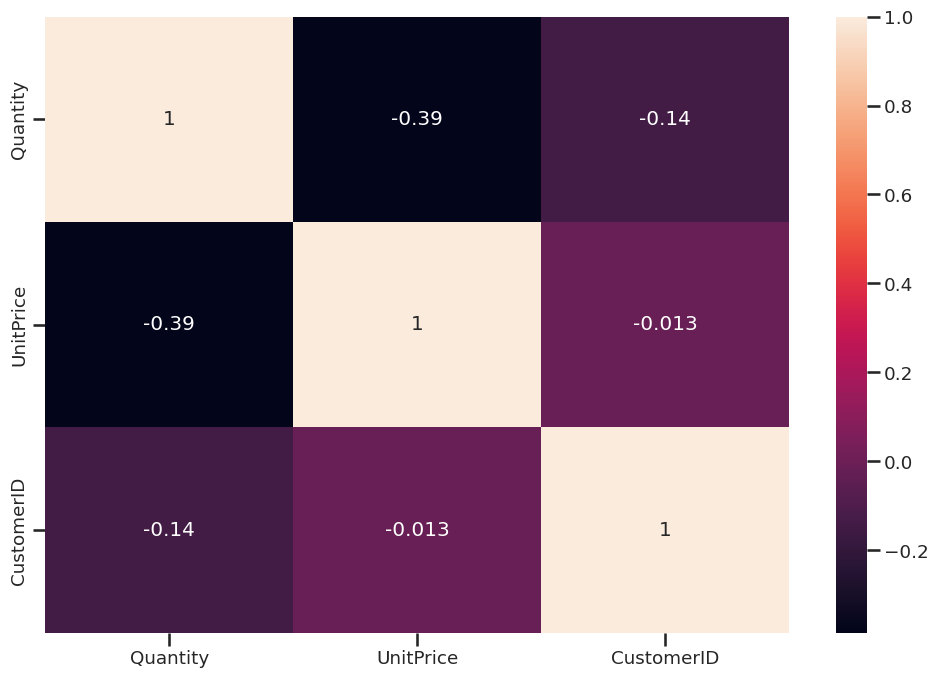

In [11]:
sns.heatmap(df_corr, annot=True)

In [12]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df.duplicated().sum().any()

True

In [14]:

(
  df.groupby(df.columns.to_list(), dropna=False)
  .size()
  .to_frame('n_duplicates')
  .query('n_duplicates>1')
  .sort_values('n_duplicates', ascending=False)
  .head()
)

n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
541266    21755     LOVE BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
572344    M         Manual                              48       10/24/2011 10:43 1.50      14607.0    United Kingdom             6

In [15]:
df = df.drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [16]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [17]:
(df.isna().sum() / df.shape[0]).to_frame("missing_pct")

,missing_pct
InvoiceNo,0.000000
StockCode,0.000000
Description,0.002709
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,0.251634
Country,0.000000


In [18]:
# identificando nulos
df_missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values("missing_count", ascending=False)
)

df_missing.style.format('{:.2%}', subset='missing_pct')

,missing_count,missing_pct
CustomerID,135037,25.16%
Description,1454,0.27%
InvoiceNo,0,0.00%
StockCode,0,0.00%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
Country,0,0.00%


In [19]:
df = df.dropna()


In [20]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Quantity'), Text(1, 0, 'UnitPrice'), Text(2, 0, 'CustomerID')])

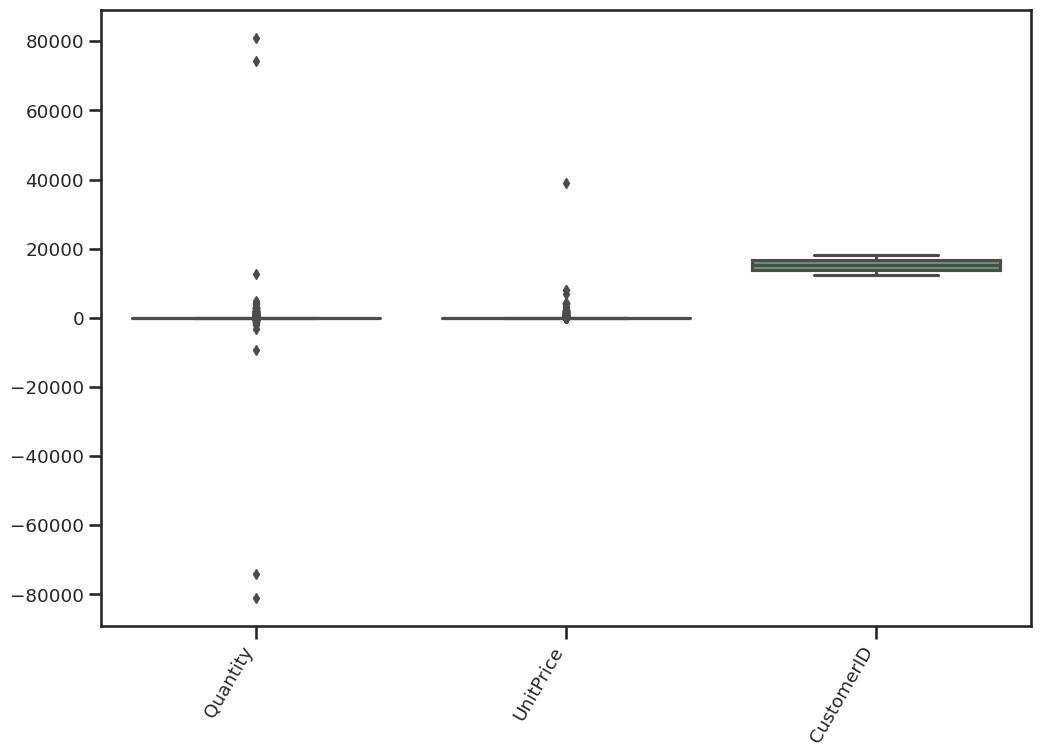

In [21]:
sns.boxplot(data=df)
plt.xticks(rotation=60, ha='right')

In [22]:
df[(df.UnitPrice<=0) | (df.Quantity<=0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [23]:
df = df[(df.UnitPrice>0) & (df.UnitPrice<5000)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [24]:
df = df[(df.Quantity>0) & (df.Quantity<10000)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392689 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392689 non-null  object 
 1   StockCode    392689 non-null  object 
 2   Description  392689 non-null  object 
 3   Quantity     392689 non-null  int64  
 4   InvoiceDate  392689 non-null  object 
 5   UnitPrice    392689 non-null  float64
 6   CustomerID   392689 non-null  float64
 7   Country      392689 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [26]:
df['CustomerID'] = df['CustomerID'].astype(int)

<ipython-input-26-b57c4042606f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


In [27]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df.info()

<ipython-input-27-789f0fa9b982>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392689 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392689 non-null  object        
 1   StockCode    392689 non-null  object        
 2   Description  392689 non-null  object        
 3   Quantity     392689 non-null  int64         
 4   InvoiceDate  392689 non-null  datetime64[ns]
 5   UnitPrice    392689 non-null  float64       
 6   CustomerID   392689 non-null  int64         
 7   Country      392689 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


(array([0, 1, 2]),
 [Text(0, 0, 'Quantity'), Text(1, 0, 'UnitPrice'), Text(2, 0, 'CustomerID')])

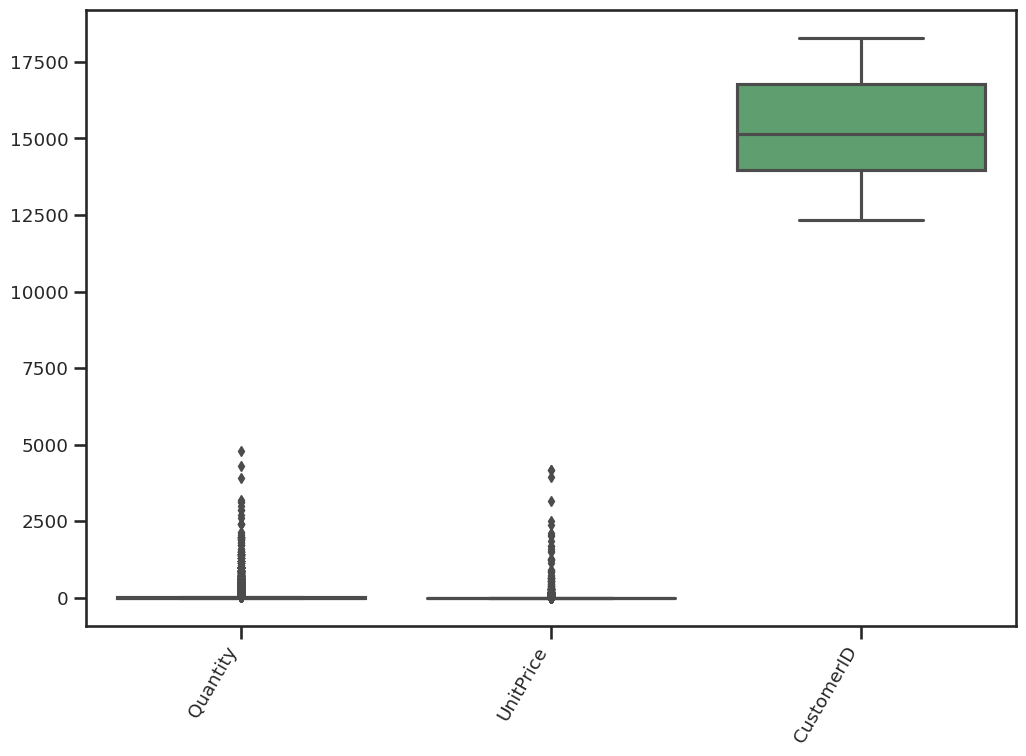

In [28]:
# COMO COLOCAR EM MELHOR ESCALA?

sns.boxplot(data=df)
plt.xticks(rotation=60, ha='right')

In [29]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df

<ipython-input-29-427fb4b8aafe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [30]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,392689.000000,392689.000000,392689.000000,392689.000000
mean,12.724550,3.105194,15287.846520,21.985370
std,43.083696,18.055047,1713.538259,95.899104
min,1.000000,0.001000,12347.000000,0.001000
25%,2.000000,1.250000,13955.000000,4.950000
50%,6.000000,1.950000,15150.000000,12.450000
75%,12.000000,3.750000,16791.000000,19.800000
max,4800.000000,4161.060000,18287.000000,38970.000000


In [32]:
agg_country_totalprice = df.groupby('Country')['TotalPrice'].agg('sum').sort_values(ascending=False).reset_index().head(10)
agg_country_totalprice

,Country,TotalPrice
0,United Kingdom,7031228.694
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


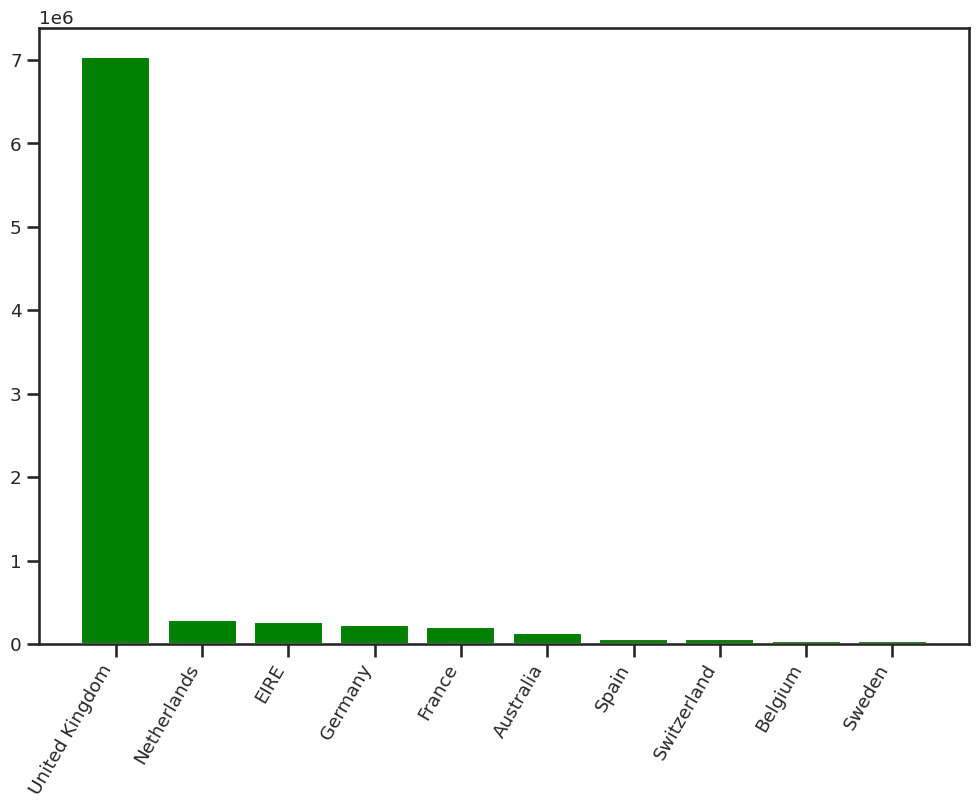

In [33]:
plt.bar(agg_country_totalprice["Country"], agg_country_totalprice ["TotalPrice"], color="green")
plt.xticks(rotation=60, ha='right');

In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [47]:
agg_descript_Quant = df.groupby('Description')['Quantity'].agg('sum').sort_values(ascending=False).head(10).reset_index()

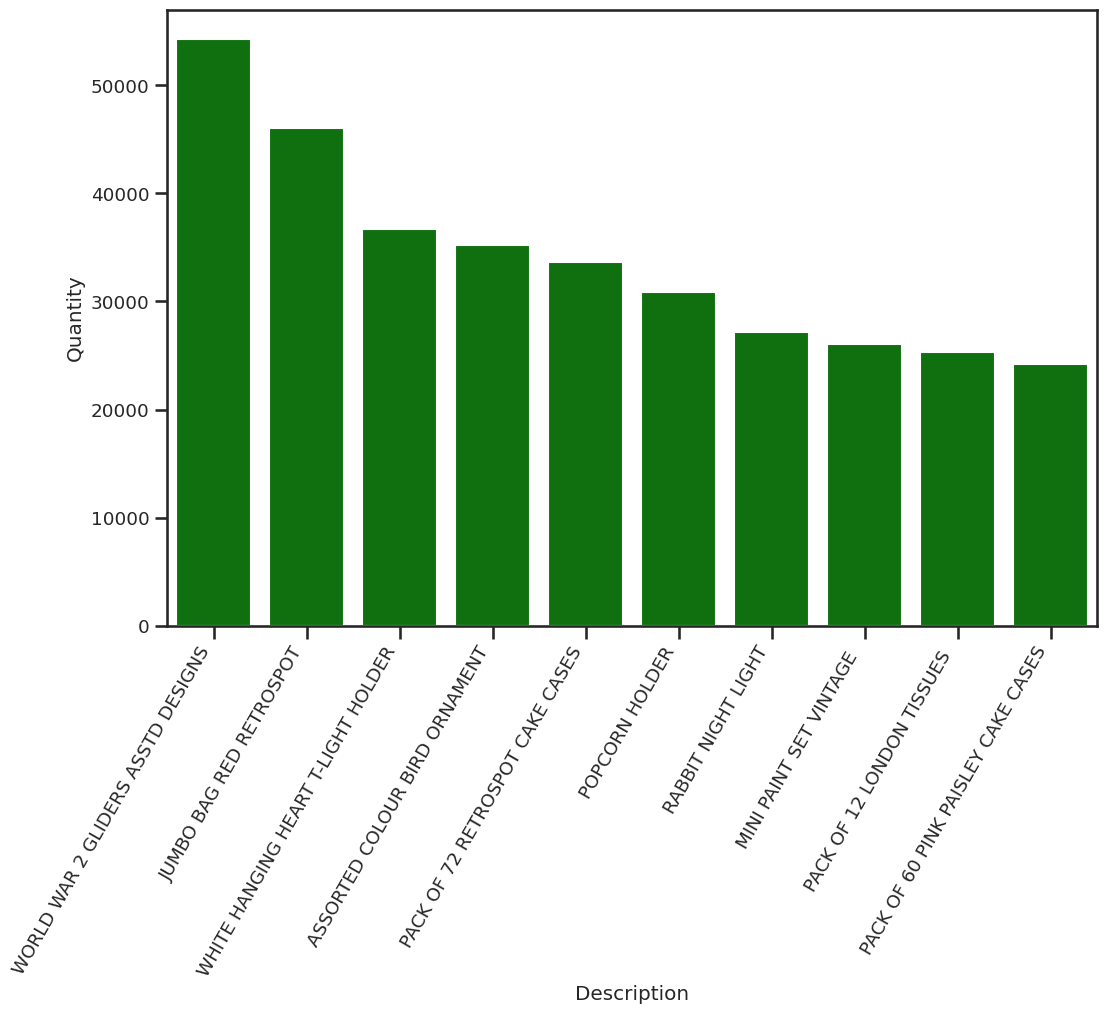

In [48]:
sns.barplot(x=agg_descript_Quant['Description'], y=agg_descript_Quant['Quantity'], color='green')
plt.xticks(rotation=60, ha='right');

In [66]:
df_monthly_sales = df.set_index('InvoiceDate').resample('MS')['TotalPrice'].sum().to_frame()
df_monthly_sales

,TotalPrice
InvoiceDate,
2010-12-01,570422.730
2011-01-01,490917.710
2011-02-01,446084.920
2011-03-01,594081.760
2011-04-01,468374.331
2011-05-01,669212.400
2011-06-01,660046.050
2011-07-01,598962.901
2011-08-01,644051.040


<Axes: xlabel='InvoiceDate', ylabel='TotalPrice'>

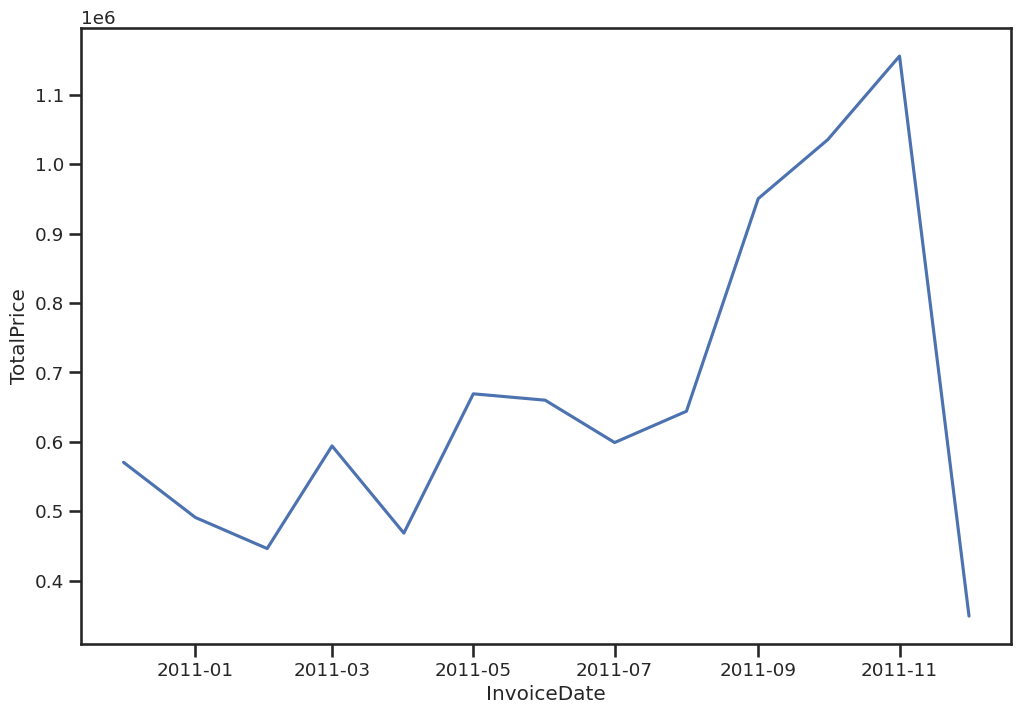

In [72]:
sns.lineplot(x=df_monthly_sales.index, y=df_monthly_sales.TotalPrice)




<Axes: xlabel='InvoiceDate', ylabel='TotalPrice'>

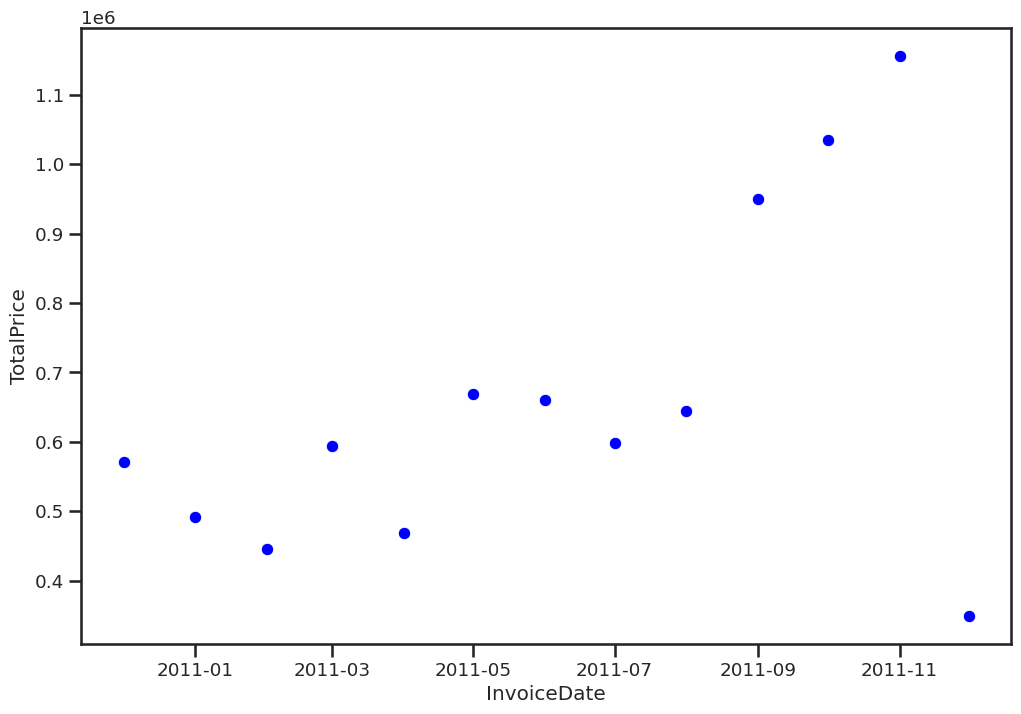

In [73]:
sns.scatterplot(x=df_monthly_sales.index, y=df_monthly_sales.TotalPrice, color='blue')


<Axes: xlabel='InvoiceDate', ylabel='TotalPrice'>

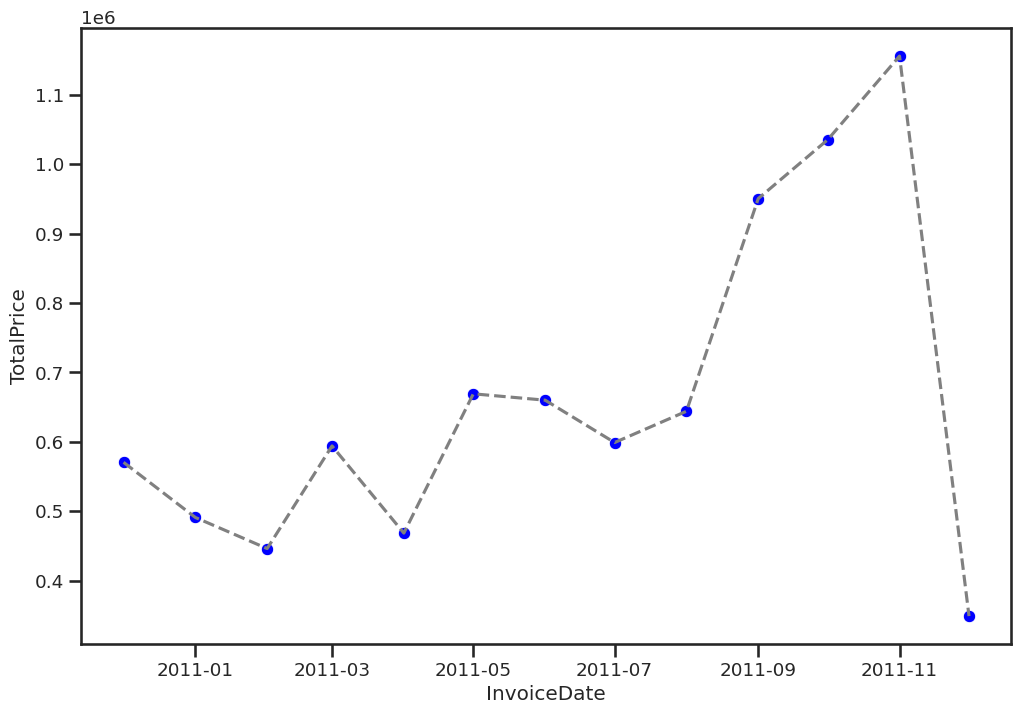

In [74]:
sns.scatterplot(x=df_monthly_sales.index, y=df_monthly_sales.TotalPrice, color='blue')
sns.lineplot(x=df_monthly_sales.index, y=df_monthly_sales.TotalPrice, color='gray', linestyle='dashed')


<Axes: xlabel='InvoiceDate', ylabel='TotalPrice'>

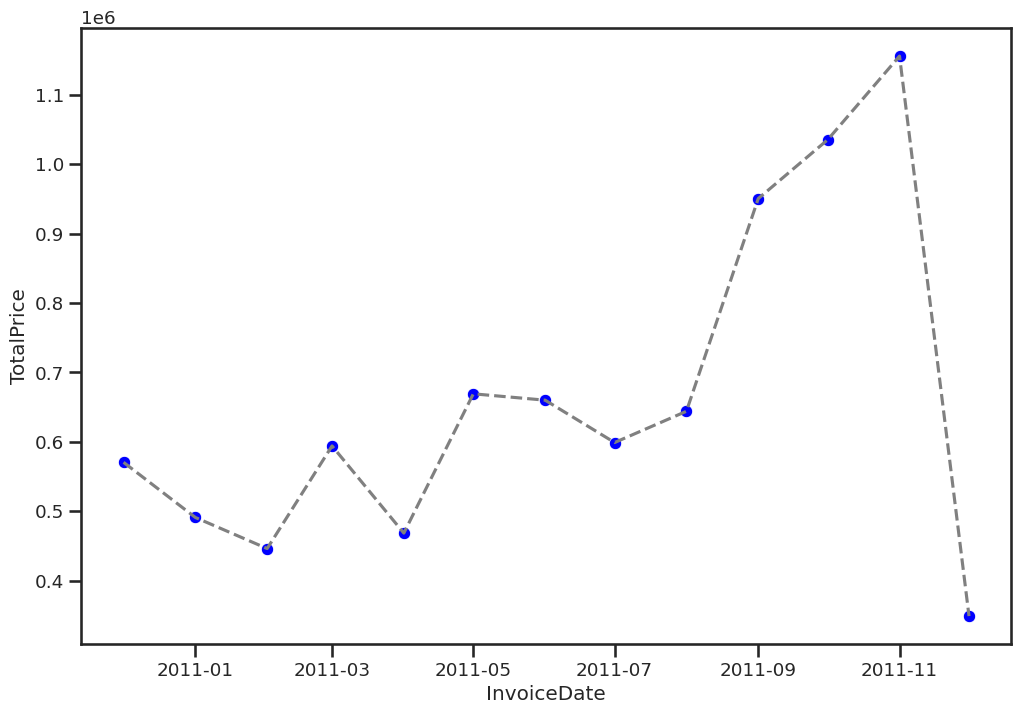

In [77]:
sns.scatterplot(x=df_monthly_sales.index, y=df_monthly_sales.TotalPrice, color='blue')
sns.lineplot(x=df_monthly_sales.index, y=df_monthly_sales.TotalPrice, color='gray', linestyle='dashed')

In [82]:
monthly_sales_country = df.groupby([df['InvoiceDate'].dt.to_period('M'), 'Country'])['TotalPrice'].sum().reset_index()
monthly_sales_country



,InvoiceDate,Country,TotalPrice
0,2010-12,Australia,965.35
1,2010-12,Austria,277.20
2,2010-12,Belgium,1809.91
3,2010-12,Channel Islands,363.53
4,2010-12,Cyprus,1587.07
...,...,...,...
282,2011-12,Portugal,2808.19
283,2011-12,Spain,316.21
284,2011-12,Sweden,238.00
285,2011-12,USA,885.24


In [100]:
sns.lineplot(x=monthly_sales_country.InvoiceDate, y=monthly_sales_country.TotalPrice)


ValueError: ignored

In [84]:
monthly_sales_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceDate  287 non-null    object 
 1   Country      287 non-null    object 
 2   TotalPrice   287 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.9+ KB


## RFM

In [31]:
last_sale = max(df.InvoiceDate)
last_sale

#ultima_compra = df.InvoiceDate.max()
#print(ultima_compra)

Timestamp('2011-12-09 12:50:00')

### Resumo de pedido de clientes


In [96]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01 08:26:00


In [99]:
resumo_cliente = df.groupby(['CustomerID', 'InvoiceNo']).agg(last_purchase = ('InvoiceDate', 'max'), total_purchase = ('TotalPrice', 'sum')).reset_index()
resumo_cliente

,CustomerID,InvoiceNo,last_purchase,total_purchase
0,12347,537626,2010-12-07 14:57:00,711.79
1,12347,542237,2011-01-26 14:30:00,475.39
2,12347,549222,2011-04-07 10:43:00,636.25
3,12347,556201,2011-06-09 13:01:00,382.52
4,12347,562032,2011-08-02 08:48:00,584.91
...,...,...,...,...
18524,18283,579673,2011-11-30 12:59:00,220.31
18525,18283,580872,2011-12-06 12:02:00,208.00
18526,18287,554065,2011-05-22 10:39:00,765.28
18527,18287,570715,2011-10-12 10:23:00,1001.32


In [106]:
df_rfm = (
    resumo_cliente
    .groupby('CustomerID')
    .agg(
        R = ('last_purchase', lambda x: (last_sale - x.max()).days),
        F = ('InvoiceNo', 'count'),
        M = ('total_purchase', 'mean')
    )

)

df_rfm

,R,F,M
CustomerID,,,
12347,1,7,615.714286
12348,74,4,449.310000
12349,18,1,1757.550000
12350,309,1,334.400000
12352,35,8,313.255000
...,...,...,...
18280,277,1,180.600000
18281,180,1,80.820000
18282,7,2,89.025000
